# Data Science With  ML and Python Assignment
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was required, in
order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed (Col -21).

# Import the relevant packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Download and explore the dataset

In [2]:
dataset= pd.read_excel("bank_data.xlsx")

In [3]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
dataset.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
dataset.shape

(45211, 17)

In [7]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
dataset.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [9]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

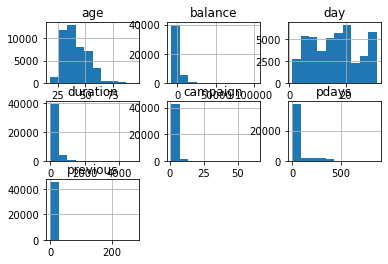

In [10]:
dataset.hist()

<AxesSubplot:xlabel='age'>

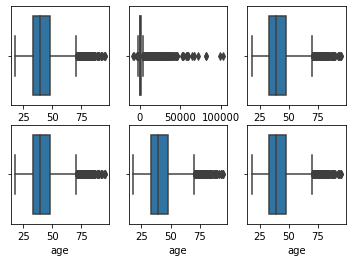

In [11]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 3)

#create boxplot in each subplot
sns.boxplot(data=dataset, x='age', ax=axes[0,0])
sns.boxplot(data=dataset, x='balance', ax=axes[0,1])
sns.boxplot(data=dataset, x='age', ax=axes[0,2])
sns.boxplot(data=dataset, x='age', ax=axes[1,0])
sns.boxplot(data=dataset, x='age', ax=axes[1,1])
sns.boxplot(data=dataset, x='age', ax=axes[1,2])

In [12]:
dataset.duplicated().sum()

0

In [13]:
##Finding availability of missing data
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Prepare the dataset for training

In [14]:
##Converting synthetic data to numeric data
dataset['default'] = dataset['default'].map( {'yes':1 ,'no':0}) 
dataset['housing'] = dataset['housing'].map( {'yes':1 ,'no':0}) 
dataset['loan'] = dataset['loan'].map(  {'yes':1 ,'no':0}) 
dataset['y'] = dataset['y'].map( {'yes':1 ,'no':0}) 

In [15]:
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


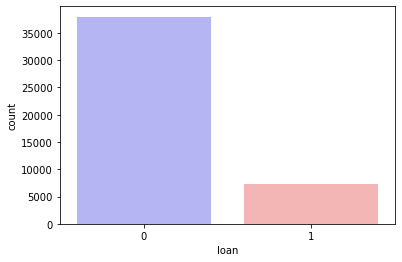

In [16]:
##Data is explored
sns.countplot(x="loan", data=dataset, palette="bwr")
plt.show()

In [17]:
countNoLoan = len(dataset[dataset.loan == 0])
countLoan = len(dataset[dataset.loan == 1])
print("Customer Don't have Loan: {:.2f}%".format((countNoLoan / (len(dataset.loan))*100)))
print("Customer having Loan: {:.2f}%".format((countLoan / (len(dataset.loan))*100)))

Customer Don't have Loan: 83.98%
Customer having Loan: 16.02%


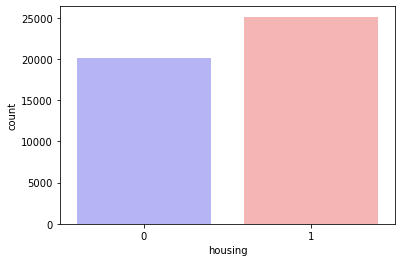

In [18]:
sns.countplot(x="housing", data=dataset, palette="bwr")
plt.show()

In [19]:
countNoLoan = len(dataset[dataset.housing == 0])
countLoan = len(dataset[dataset.housing == 1])
print("Customer that don't Have a housing Loan: {:.2f}%".format((countNoLoan / (len(dataset.housing))*100)))
print("Customer having housing Loan: {:.2f}%".format((countLoan / (len(dataset.housing))*100)))

Customer that don't Have a housing Loan: 44.42%
Customer having housing Loan: 55.58%


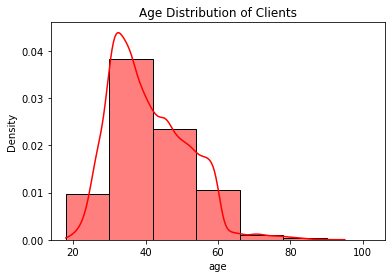

In [20]:
##Checking age distribution
age_plot = sns.histplot(data=dataset, x="age",stat="density", color = "red", 
            binwidth= 12, kde=True, legend = True).set(title='Age Distribution of Clients')

[Text(0.5, 1.0, 'Marital Distribution')]

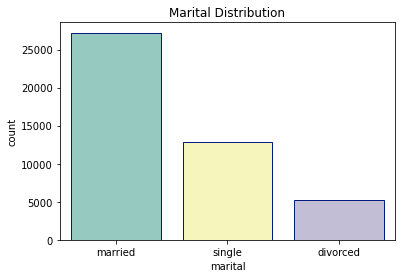

In [21]:
##Checking Marital Status
sns.countplot(x = dataset["marital"], palette="Set3", edgecolor=sns.color_palette("dark", 1)).set(title = "Marital Distribution")

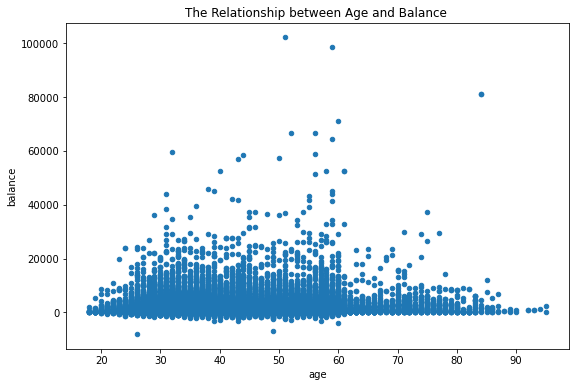

In [22]:
##Relation between age and balance
scatter_age_balance = dataset.plot.scatter('age','balance',figsize = (9,6))

plt.title('The Relationship between Age and Balance ')
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'management'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

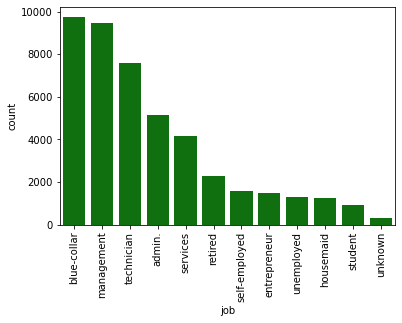

In [23]:
##Checking job Counts
sns.countplot(x='job', data=dataset, color='green', 
              order=dataset['job'].value_counts().index, );
plt.xticks(rotation = 90)

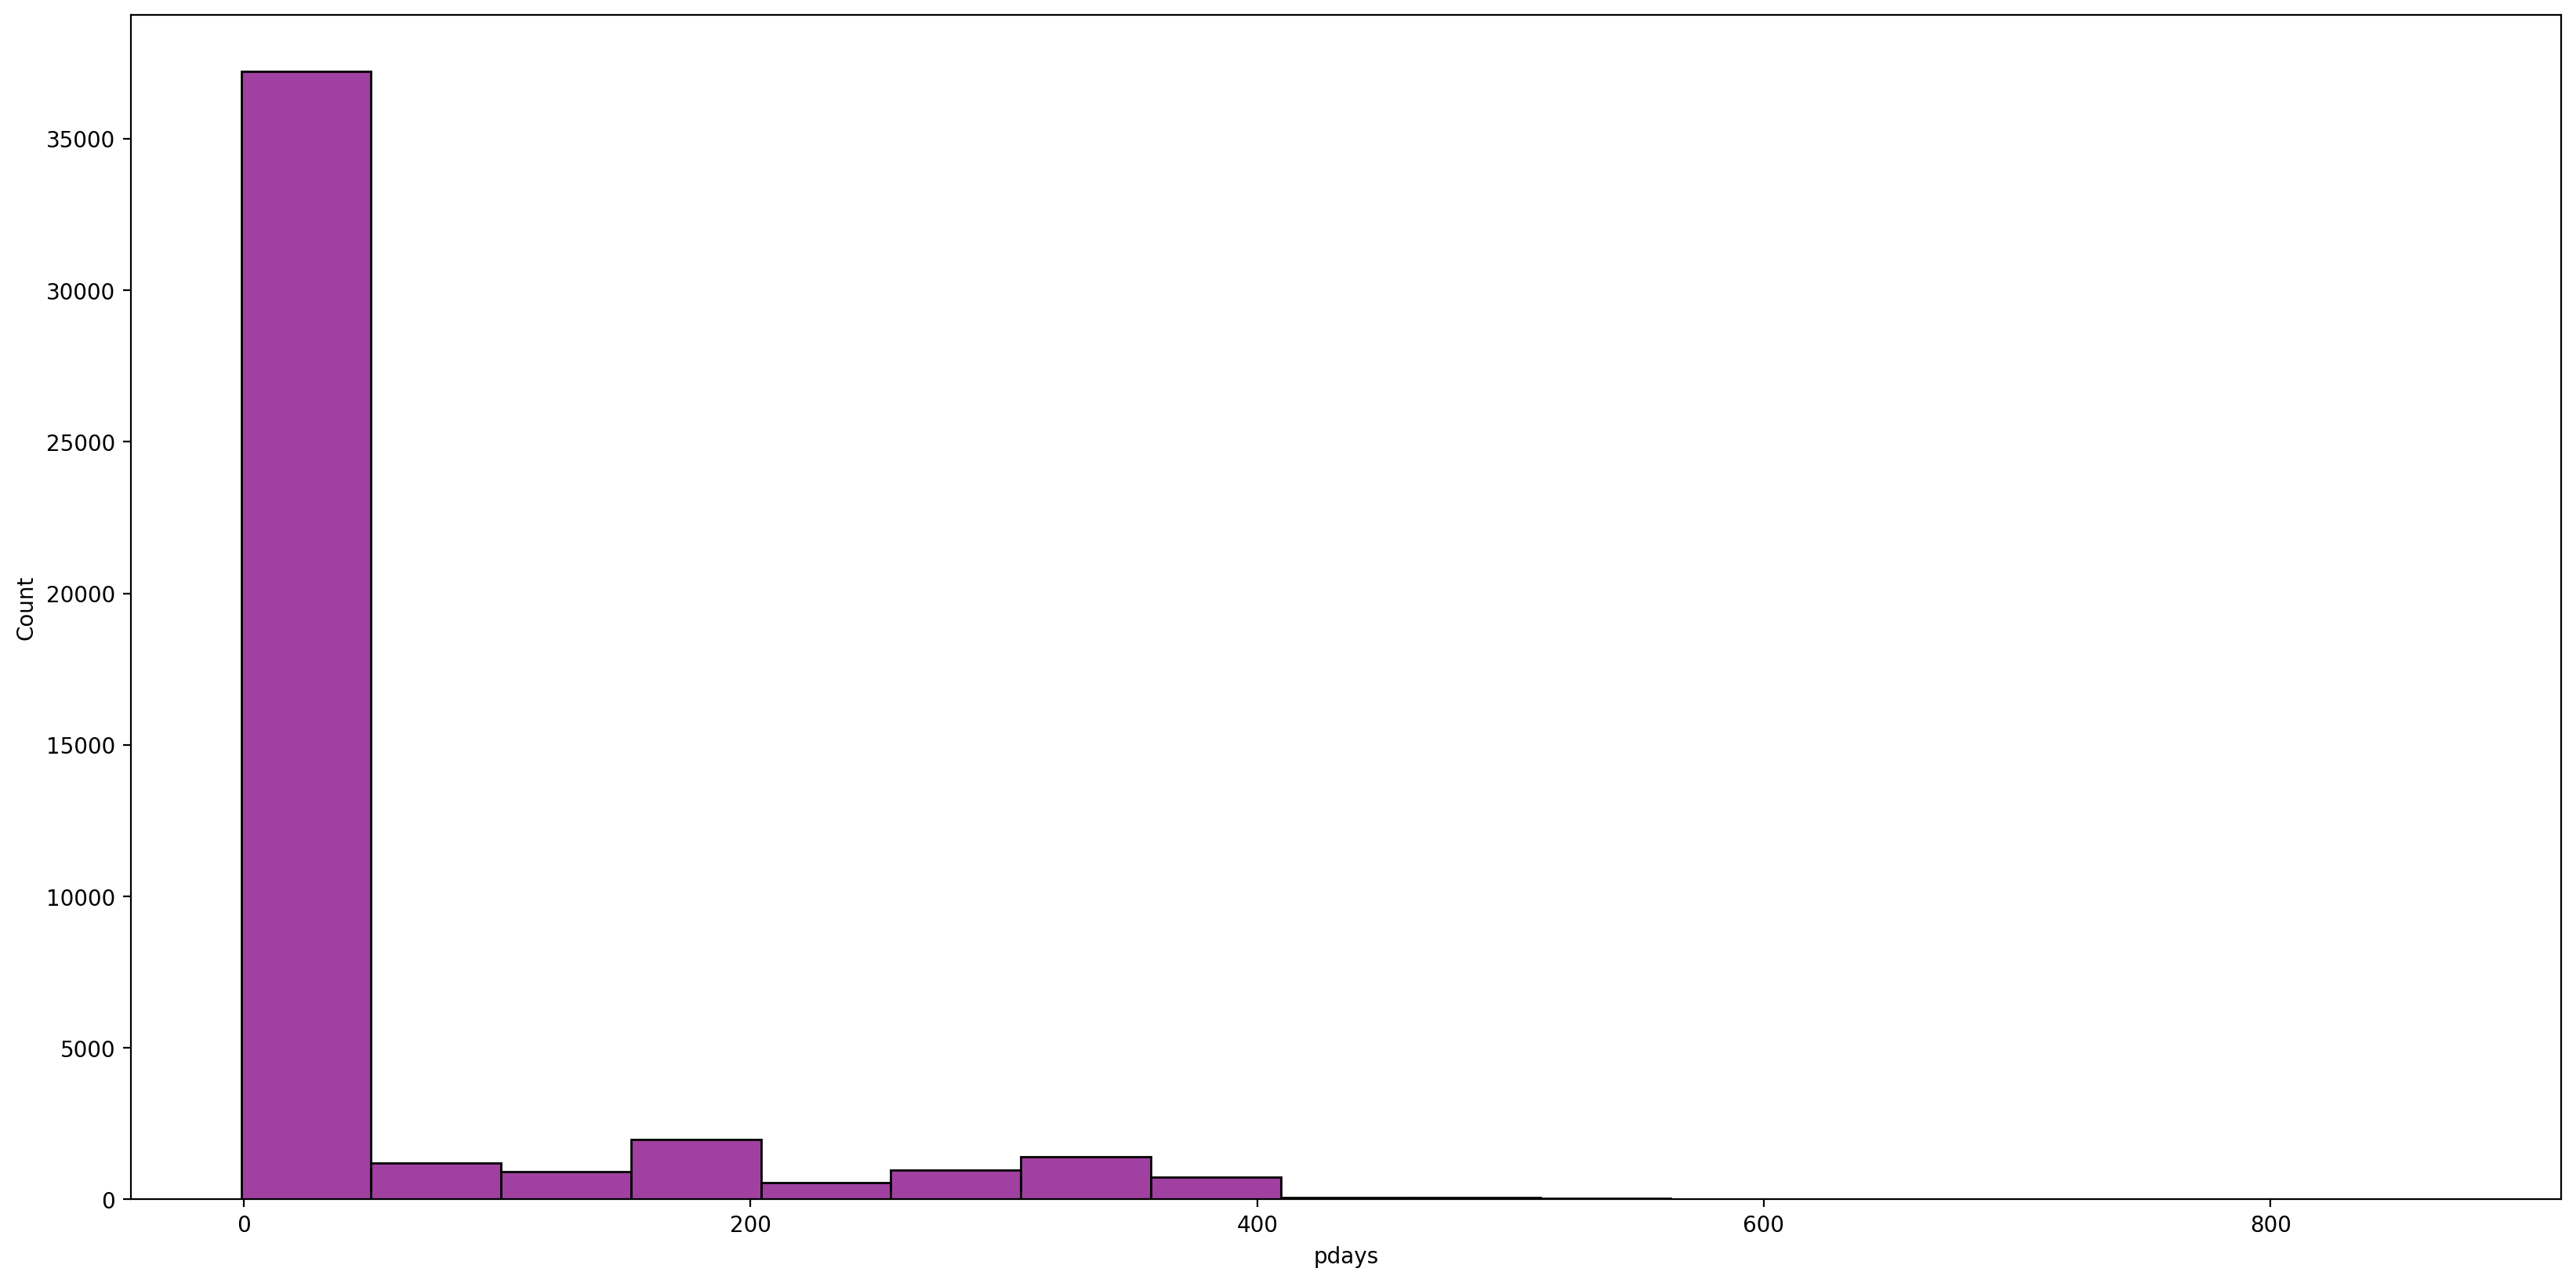

In [24]:
##P days distribution
##here -1 represents client was not previously contacted.
plt.figure(figsize=(20,10),dpi=200)
sns.histplot(data=dataset,x='pdays',color='purple')
plt.show()

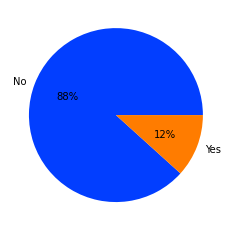

In [25]:
##EDA ANALYSIS
#Visuvalizing the yes and no from the target varible 'y'
m=list(dataset['y'].value_counts())
l11=['No','Yes']
l12=[m[0],m[1]]
colors = sns.color_palette('bright')
plt.pie(l12, labels=l11,colors = colors, autopct = '%0.0f%%')
plt.show()

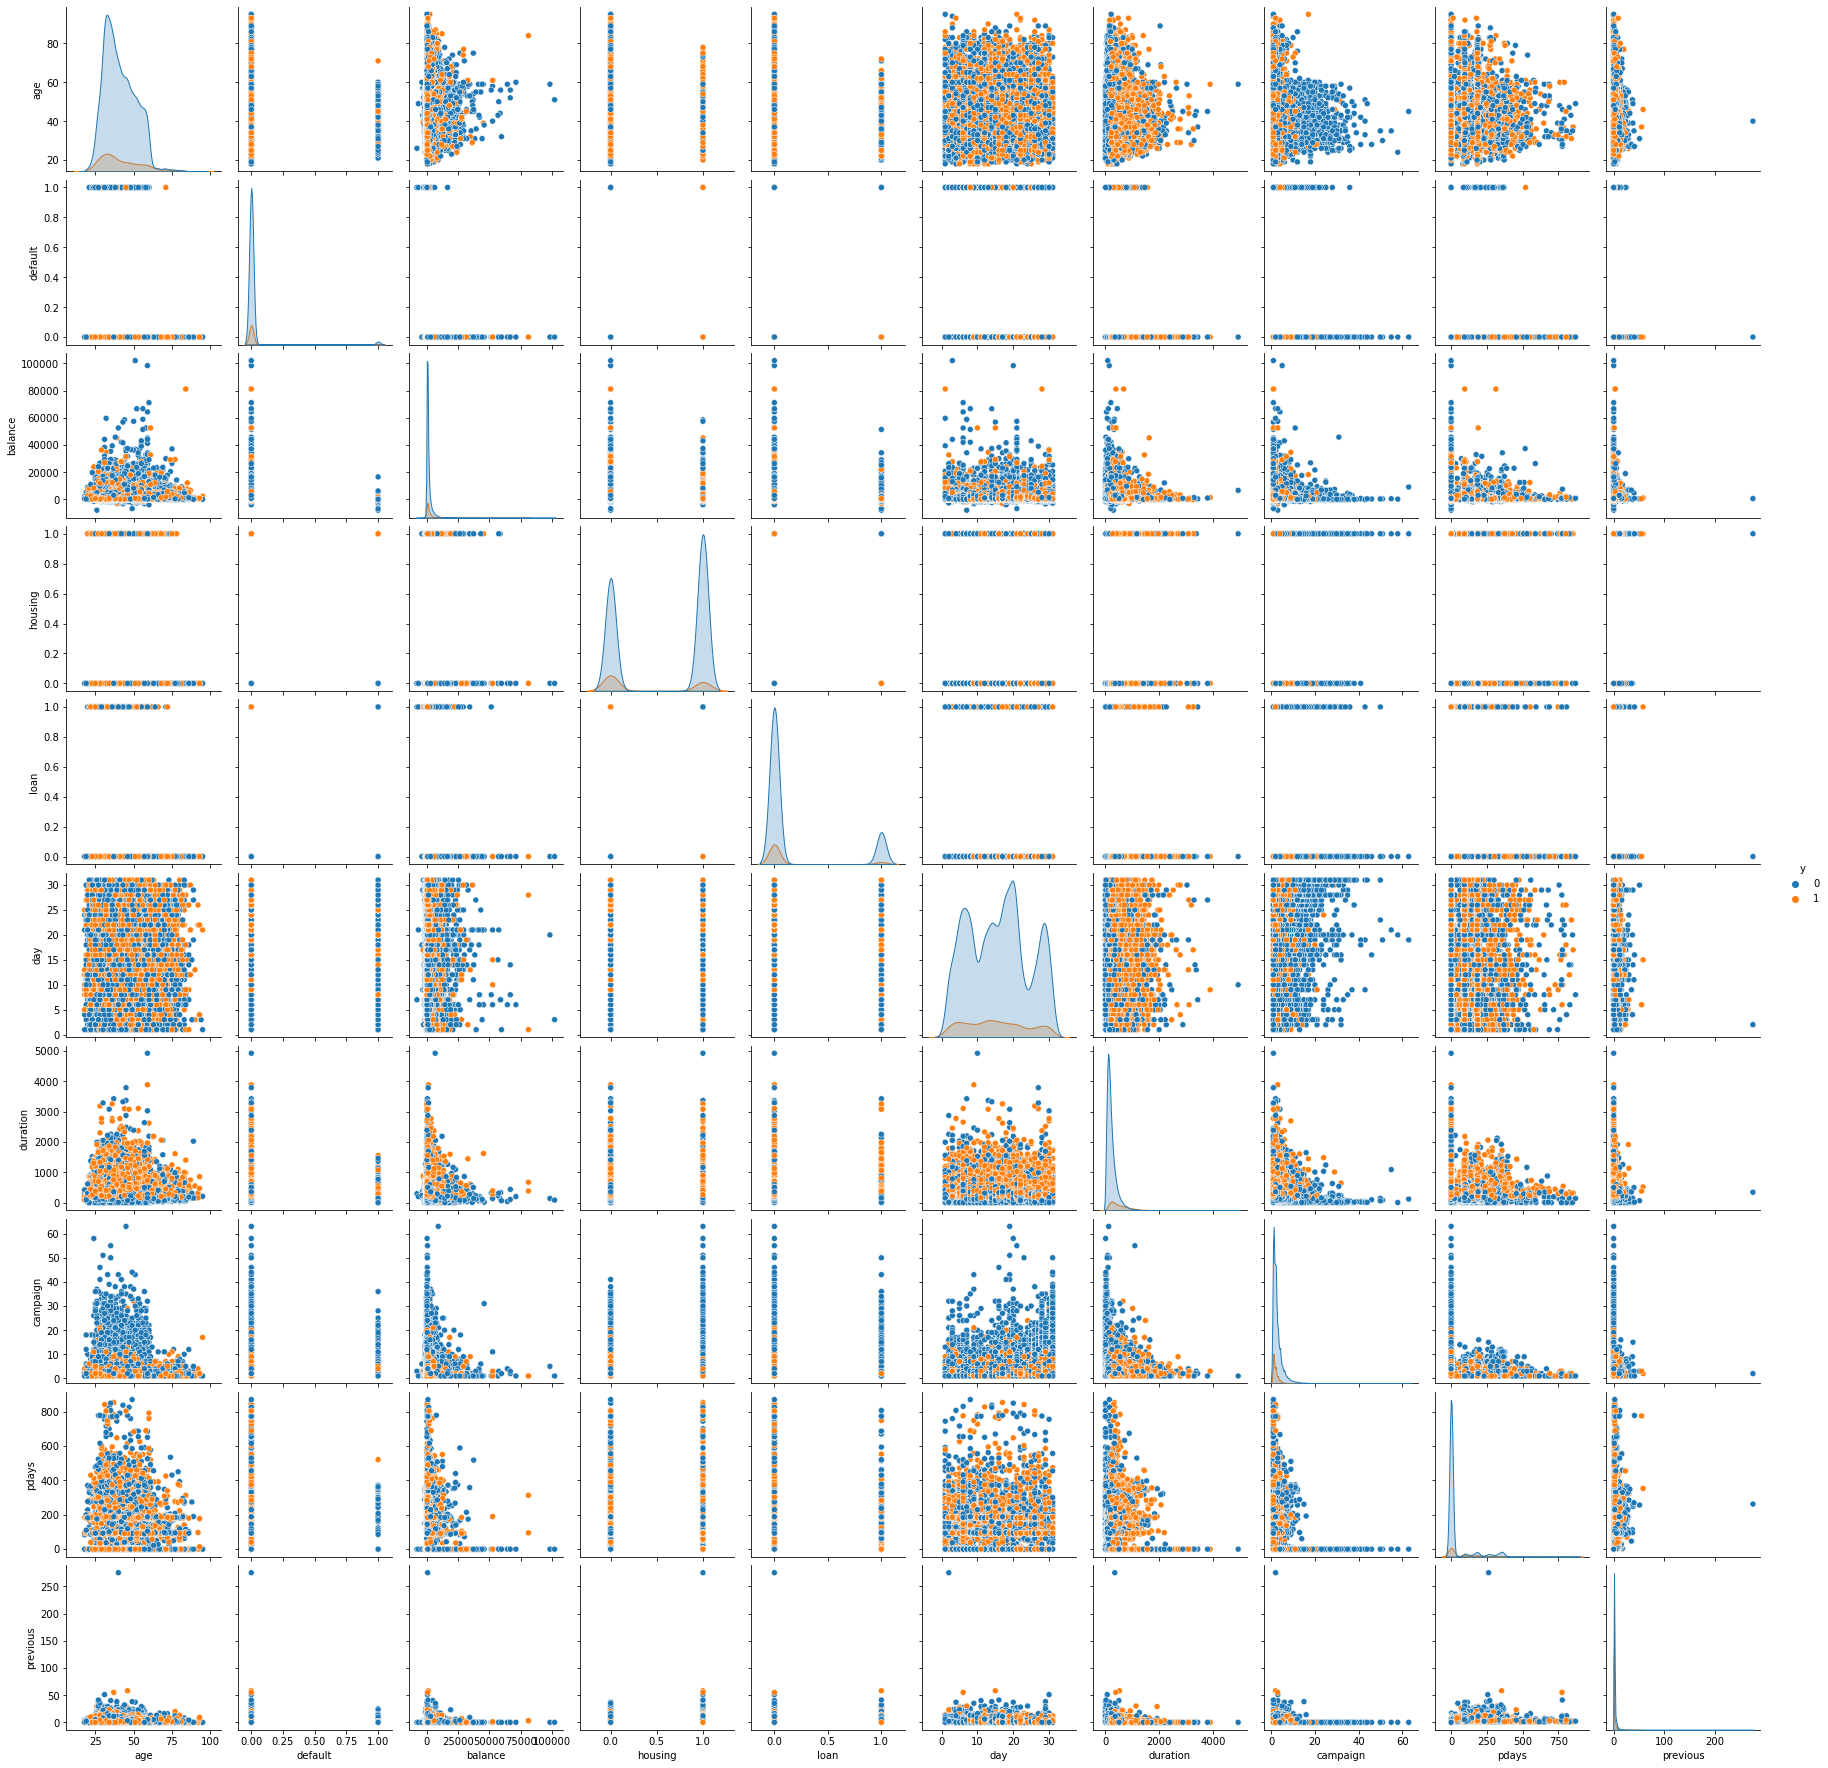

In [26]:
sn.pairplot(dataset,hue='y')
plt.show()

In [27]:
##Corerelation
dataset.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236


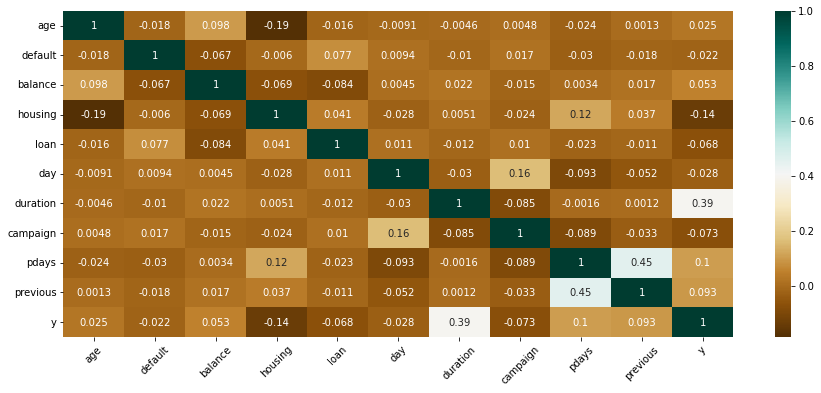

In [28]:
##Heatmap
fig= plt.figure(figsize=(15, 6))
sns.heatmap(dataset.corr(),cmap="BrBG",annot=True);
plt.xticks(rotation=45);


In [29]:
dataset = dataset.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
dataset.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


# Train the model to fit the data

In [30]:
##Traning data
y = dataset.y.values
x_data = dataset.drop(['y'], axis = 1)


In [31]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [33]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#  Generating a predicted result from the system

In [34]:
##Logistic regression
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.81%


In [35]:
##K-Nearest Neighbour (KNN) Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} KNN Score: {:.2f}%".format(max, knn.score(x_test.T, y_test.T)*100))

<built-in function max> KNN Score: 89.15%


In [36]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 89.58%


# Test case Checking for our model performance

In [37]:
rf.predict([[46,3,0,1,0,6879,0,0,1,15]])

array([0], dtype=int64)

In [38]:
rf.predict([[34,1,0,1,0,133,0,0,1,15]])

array([0], dtype=int64)

In [39]:
##I have got the maximum accuracy with Random Forest Classification

# NIDHI KUMARI,TCRIB3R10